<a href="https://colab.research.google.com/github/stepan-ha/Flows/blob/master/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import imageio
import os

Функція побудови графіку Лінійної регресії

In [20]:
def run_linear_regression():
    true_a, true_b = 3, 4
    X = 2 * np.random.rand(100, 1)
    noise = np.random.randn(100, 1)
    y = true_b + true_a * X + noise

    np.random.seed()
    w1 = np.random.randn()
    w0 = np.random.randn()
    initial_weights = (w1, w0)
    print(f"Початкові випадкові ваги: w1 = {w1:.2f}, w0 = {w0:.2f}")

    plt.figure(figsize=(10, 7))
    plt.scatter(X, y, label='Згенеровані дані')
    x_line = np.array([0, 2])
    y_line_initial = initial_weights[0] * x_line + initial_weights[1]
    plt.plot(x_line, y_line_initial, 'r-', label='Початкова модель (випадкова)')
    plt.title('Лінійна регресія: Початковий стан')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

    learning_rate = 0.1
    n_epochs = 100
    trained_weights, loss_history = train_linear_regression(X, y, initial_weights, learning_rate, n_epochs)
    print(f"Навчені ваги: w1 = {trained_weights[0]:.2f}, w0 = {trained_weights[1]:.2f}")
    print(f"Справжні коефіцієнти: a = {true_a}, b = {true_b}")

    plt.figure(figsize=(10, 7))
    plt.scatter(X, y, label='Згенеровані дані')
    y_line_trained = trained_weights[0] * x_line + trained_weights[1]
    plt.plot(x_line, y_line_trained, 'g-', label='Натренована модель')
    plt.title('Лінійна регресія: Результат навчання')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 7))
    plt.plot(range(n_epochs), loss_history)
    plt.title('Графік функції втрат (MSE) під час навчання')
    plt.xlabel('Епоха')
    plt.ylabel('Середньоквадратична помилка (MSE)')
    plt.grid(True)
    plt.show()

Функція тренування Лінійної регресії

In [21]:
def train_linear_regression(X, y, initial_weights, learning_rate, n_epochs):
    w1, w0 = initial_weights
    m = len(y)
    loss_history = []

    for epoch in range(n_epochs):
        y_pred = w1 * X + w0
        loss = np.mean((y_pred - y) ** 2)
        loss_history.append(loss)
        dj_dw1 = (2/m) * np.sum((y_pred - y) * X)
        dj_dw0 = (2/m) * np.sum(y_pred - y)
        w1 -= learning_rate * dj_dw1
        w0 -= learning_rate * dj_dw0

    return (w1, w0), loss_history

Функція Логістичнгої регресії

In [22]:
def run_logistic_regression():
    X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state=42, cluster_std=1.2)
    y = y.reshape(-1, 1)

    X_b = np.c_[np.ones((len(X), 1)), X]

    np.random.seed(42)
    initial_weights = np.random.randn(X_b.shape[1], 1)
    print(f"Початкові випадкові ваги (w0, w1, w2): \n{initial_weights.flatten()}")

    plt.figure(figsize=(10, 7))
    plot_decision_boundary(X, y, initial_weights, "Логістична регресія: Початковий стан")
    plt.show()

    learning_rate = 0.1
    n_epochs = 200
    batch_size = 32

    if not os.path.exists("frames"):
        os.makedirs("frames")

    trained_weights, loss_history, frames = train_logistic_regression(X_b, y, initial_weights, learning_rate, n_epochs, batch_size)
    print(f"Навчені ваги (w0, w1, w2): \n{trained_weights.flatten()}")

    plt.figure(figsize=(10, 7))
    plot_decision_boundary(X, y, trained_weights, "Логістична регресія: Результат навчання")
    plt.show()

    plt.figure(figsize=(10, 7))
    plt.plot(loss_history)
    plt.title('Графік функції втрат (Binary Cross-Entropy) під час навчання')
    plt.xlabel('Ітерація (по батчах)')
    plt.ylabel('Втрати')
    plt.grid(True)
    plt.show()
    imageio.mimsave('logistic_regression_training.gif', frames, fps=10)


    for frame_file in os.listdir("frames"):
        os.remove(os.path.join("frames", frame_file))
    os.rmdir("frames")

Функція тренування Логістичної регресії

In [23]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def train_logistic_regression(X_b, y, initial_weights, learning_rate, n_epochs, batch_size):
    weights = initial_weights
    m = len(y)
    loss_history = []
    frames = []

    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, m, batch_size):
            X_i = X_b_shuffled[i:i+batch_size]
            y_i = y_shuffled[i:i+batch_size]

            z = X_i.dot(weights)
            y_pred = sigmoid(z)

            epsilon = 1e-7
            loss = -np.mean(y_i * np.log(y_pred + epsilon) + (1 - y_i) * np.log(1 - y_pred + epsilon))
            loss_history.append(loss)

            gradient = (1/len(y_i)) * X_i.T.dot(y_pred - y_i)
            weights -= learning_rate * gradient

        if epoch % 10 == 0:
            fig = plt.figure(figsize=(10, 7))
            plot_decision_boundary(X_b[:, 1:], y, weights, f"Епоха: {epoch}")

            fig.canvas.draw()
            image = np.frombuffer(fig.canvas.buffer_rgba(), dtype='uint8')
            image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))

            frames.append(image)
            plt.close(fig)

    return weights, loss_history, frames

Допоміжна функція візуалізації

In [24]:
def plot_decision_boundary(X, y, weights, title):
    plt.scatter(X[y.flatten() == 0][:, 0], X[y.flatten() == 0][:, 1], color='blue', label='Клас 0')
    plt.scatter(X[y.flatten() == 1][:, 0], X[y.flatten() == 1][:, 1], color='orange', label='Клас 1')

    x1_plot = np.array([np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1])
    x2_plot = (-weights[0] - weights[1] * x1_plot) / weights[2]

    plt.plot(x1_plot, x2_plot, "g-", label="Межа рішень")

    plt.title(title)
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.legend()
    plt.grid(True)
    plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

Початкові випадкові ваги: w1 = -0.41, w0 = -1.03


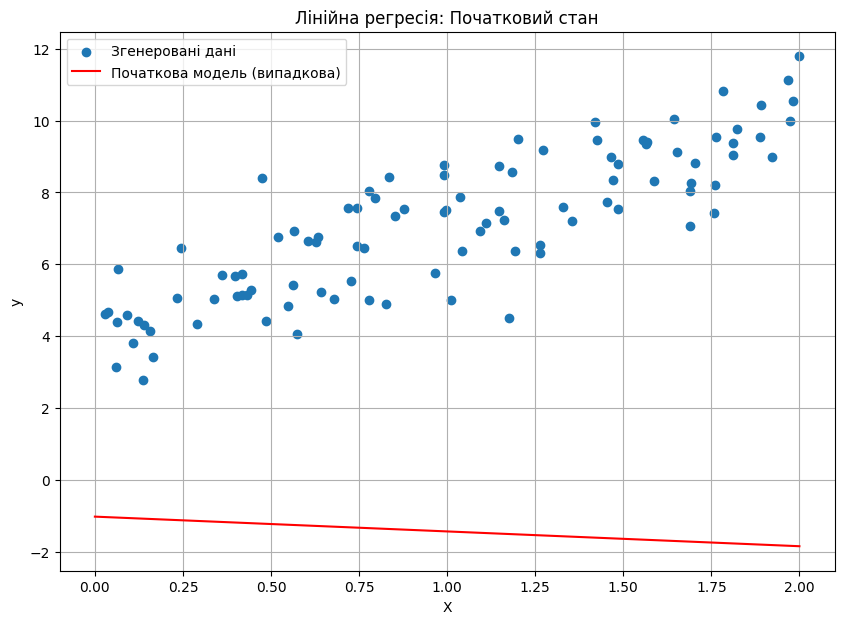

Навчені ваги: w1 = 2.99, w0 = 4.12
Справжні коефіцієнти: a = 3, b = 4


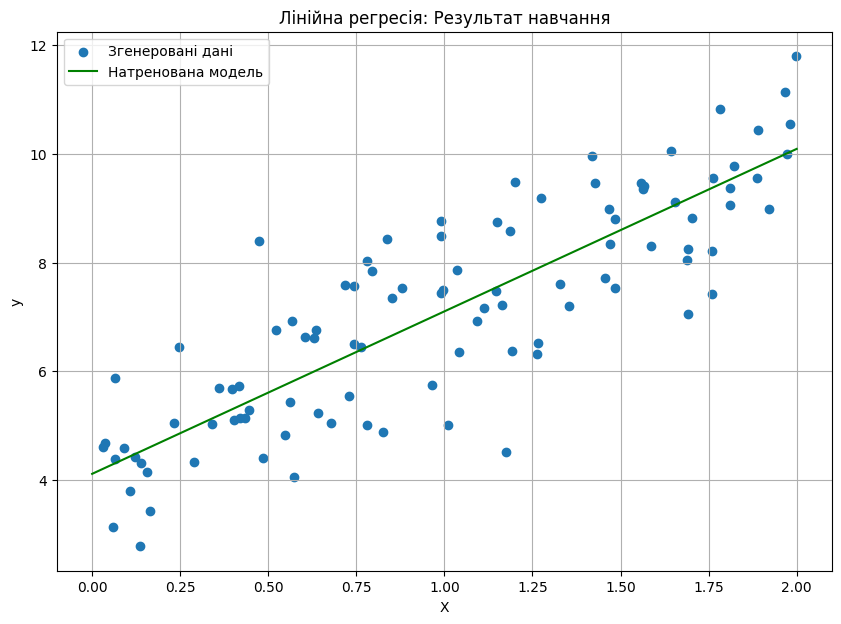

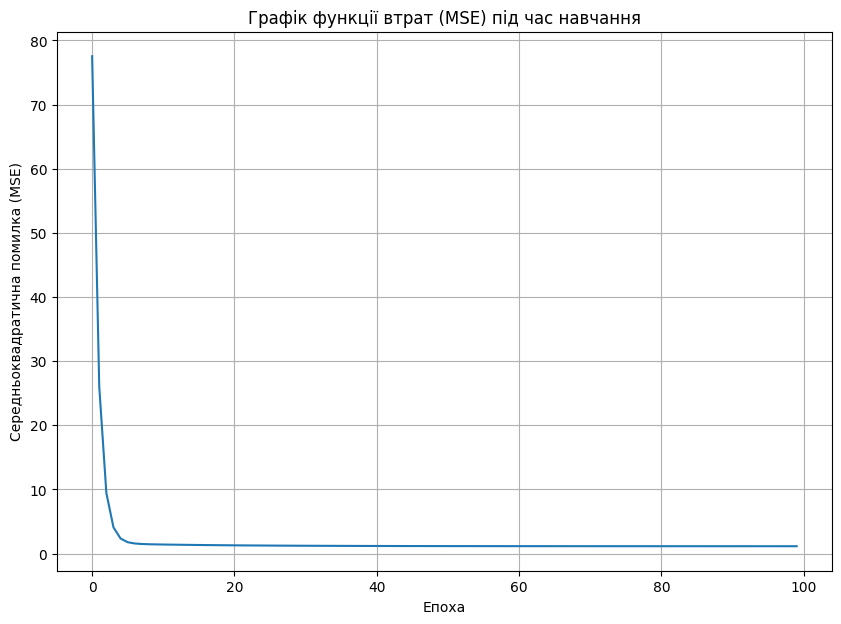

Початкові випадкові ваги (w0, w1, w2): 
[ 0.49671415 -0.1382643   0.64768854]


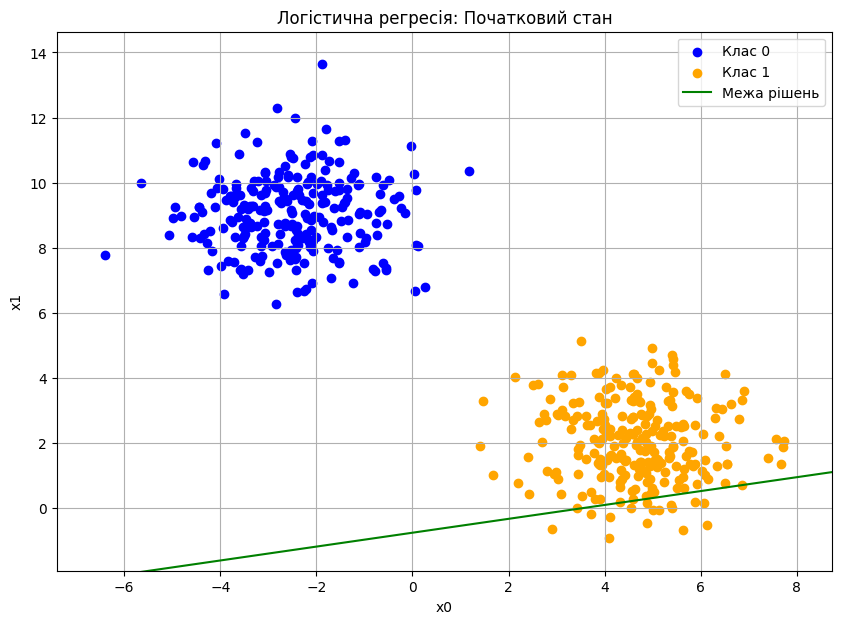

Навчені ваги (w0, w1, w2): 
[ 0.81505216  2.37840603 -0.7008822 ]


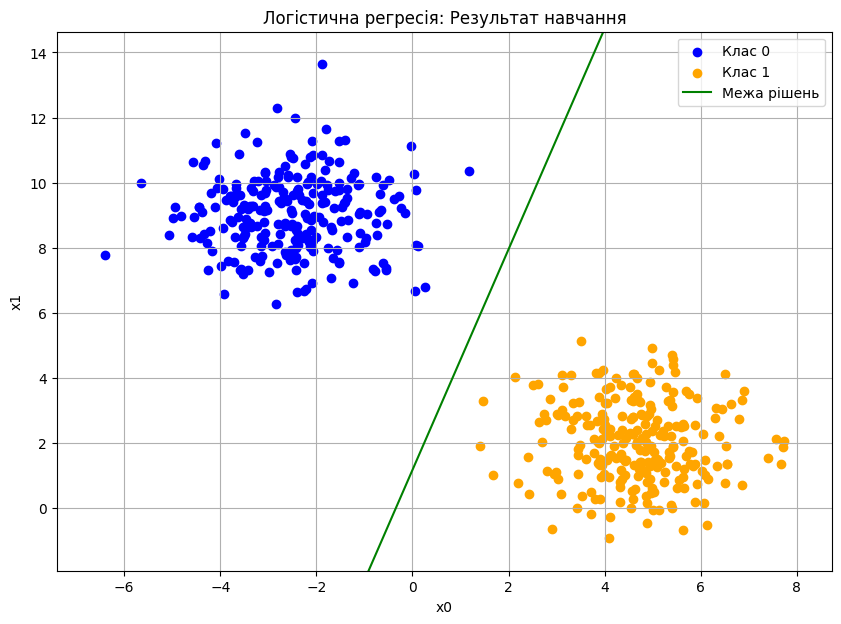

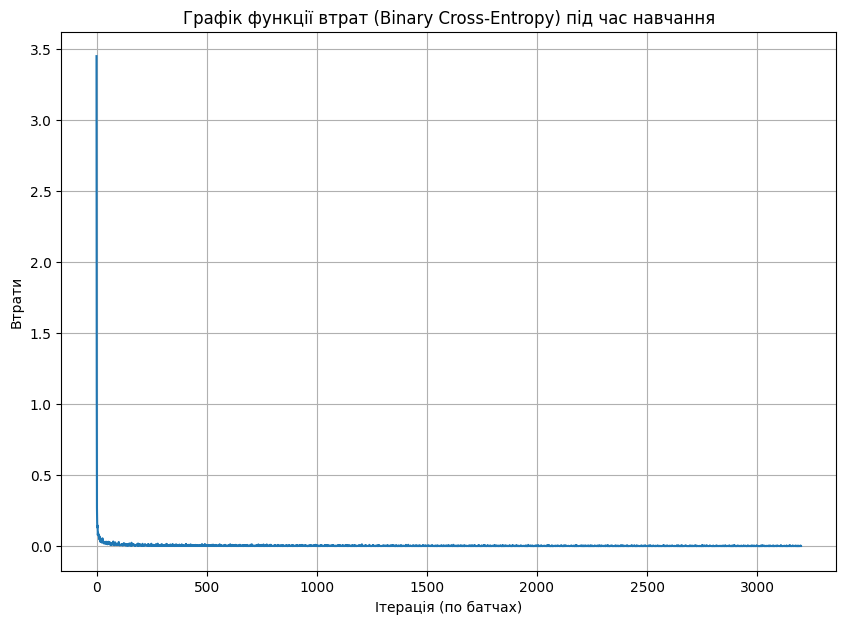

In [25]:

if __name__ == '__main__':
    run_linear_regression()
    run_logistic_regression()